In [ ]:
%load_ext autoreload
%autoreload 2

In [15]:
from data_reader import get_data_arr
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import os
from data_reader import get_data_stratify

In [16]:
%matplotlib inline  
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)
import matplotlib.pyplot as plt
from time import gmtime, strftime

In [27]:
# import file containing models
from transfer_models import *
from utils import compute_accuracy, test_from_reader_data

In [ ]:
def plot_history(history):
    # list all data in history
    #print(history.history.keys())

    y1_1 = history['loss']
    y1_2 = history['val_loss']

    fig, axarr = plt.subplots(nrows=2, sharex=True)
    axarr[0].plot(y1_1, label='train')
    axarr[0].plot(y1_2, label='val')
    axarr[0].set_title('loss')
    axarr[0].legend(loc='upper right')

    y2_1 = history['acc']
    y2_2 = history['val_acc']
    axarr[1].set_title('accuracy')
    axarr[1].plot(y2_1, label='train')
    axarr[1].plot(y2_2, label='val')
    axarr[1].legend(loc='lower right')

In [ ]:
def plot_acc(history):
    

In [4]:
# office 12 objects
classes_reader = ["apple", "pen", "book", "monitor", "mouse", "wallet", "keyboard",
                  "banana", "key", "mug", "pear", "orange"]

Experiment augmentation from array image.

In [22]:
x_train, y_train, x_val, y_val, x_test, y_test = get_data_arr()

Read data from mydata_1200.npz 



In [29]:
# Simple model with resnet-(256, 0.5)
resnet_256 = get_model([(256, 0.5)])
resnet_256 = build_model(resnet_256, learning_rate=1e-4)

initializer = he_normal and l2 regularizer reg = 0.010000
added fc-256 with dropout keep probability 0.500000


/home/hav16/vgg_transfer/transfer_models.py:83: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  model = keras.models.Model(input=base_model.input, output=fc_model(base_model.output))


In [30]:
# let's do an experiment with 
lrPlatCallBack = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3,
                                                       verbose=1, mode='auto',
                                                       epsilon=0.0001, cooldown=0, min_lr=1e-6)

Train on 8064 samples, validate on 2016 samples
Epoch 1/30
8064/8064 [==============================] - 91s - loss: 5.2015 - acc: 0.5371 - val_loss: 4.1546 - val_acc: 0.8075
Epoch 2/30
8064/8064 [==============================] - 90s - loss: 4.0846 - acc: 0.7548 - val_loss: 3.5973 - val_acc: 0.8413
Epoch 3/30
8064/8064 [==============================] - 90s - loss: 3.5223 - acc: 0.8012 - val_loss: 3.1567 - val_acc: 0.8611
Epoch 4/30
8064/8064 [==============================] - 90s - loss: 3.0799 - acc: 0.8309 - val_loss: 2.7909 - val_acc: 0.8715
Epoch 5/30
8064/8064 [==============================] - 90s - loss: 2.7110 - acc: 0.8501 - val_loss: 2.4839 - val_acc: 0.8805
Epoch 6/30
8064/8064 [==============================] - 90s - loss: 2.3972 - acc: 0.8656 - val_loss: 2.2036 - val_acc: 0.8849
Epoch 7/30
8064/8064 [==============================] - 90s - loss: 2.1302 - acc: 0.8772 - val_loss: 1.9857 - val_acc: 0.8829
Epoch 8/30
8064/8064 [==============================] - 90s - loss: 1.

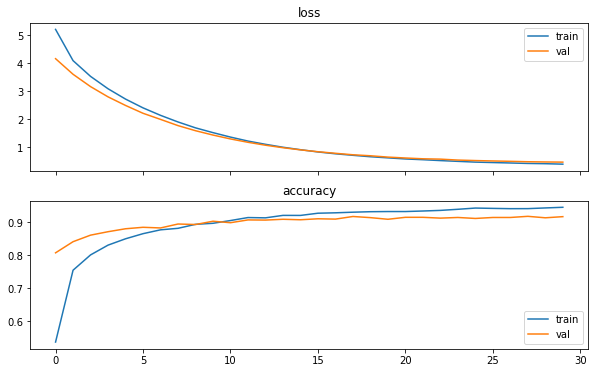

In [31]:
history_resnet_256 = resnet_256.fit(x_train, y_train, batch_size=48, epochs=30,
                                    validation_data=(x_val, y_val), verbose=2,
                                    callbacks=[lrPlatCallBack])

plot_history(history_resnet_256.history)

In [42]:
# let's use data augmentation to see if this helps
train_datagen = ImageDataGenerator(
        #featurewise_center=True,
        #featurewise_std_normalization=True,
        rescale=1./255,
        shear_range=0.02,
        zoom_range=0.02,
        rotation_range=20,
        horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(x_train)

In [ ]:
resnet_256_with_augment = get_model([(256, 0.5)])
resnet_256_with_augment = build_model(resnet_256_with_augment, learning_rate=1e-4)

lrPlatCallBack2 = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3,
                                                       verbose=1, mode='auto',
                                                       epsilon=0.0001, cooldown=0, min_lr=1e-6)

resnet_256_with_augment_history = resnet_256_with_augment.fit_generator(
    train_datagen.flow(x_train, y_train, batch_size=48),
    steps_per_epoch=len(x_train) / 48,
    epochs=30, 
    validation_data=val_datagen.flow(x_val, y_val), 
    validation_steps=len(x_val)/48,
    verbose=2,
    callbacks=[lrPlatCallBack2])

plot_history(resnet_256_with_augment_history.history)

initializer = he_normal and l2 regularizer reg = 0.010000
added fc-256 with dropout keep probability 0.500000


/home/hav16/vgg_transfer/transfer_models.py:83: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  model = keras.models.Model(input=base_model.input, output=fc_model(base_model.output))


Epoch 1/30
168/168 [==============================] - 87s - loss: 5.3723 - acc: 0.4859 - val_loss: 6.2130 - val_acc: 0.0789
Epoch 2/30
168/168 [==============================] - 83s - loss: 4.2368 - acc: 0.7164 - val_loss: 5.6366 - val_acc: 0.1451
Epoch 3/30
168/168 [==============================] - 83s - loss: 3.6882 - acc: 0.7659 - val_loss: 4.7685 - val_acc: 0.3490
Epoch 4/30
168/168 [==============================] - 83s - loss: 3.2589 - acc: 0.7975 - val_loss: 3.7488 - val_acc: 0.5923
Epoch 5/30
168/168 [==============================] - 83s - loss: 2.9015 - acc: 0.8170 - val_loss: 2.9453 - val_acc: 0.7664
Epoch 6/30
168/168 [==============================] - 83s - loss: 2.5990 - acc: 0.8282 - val_loss: 2.4579 - val_acc: 0.8289
Epoch 7/30
168/168 [==============================] - 83s - loss: 2.3232 - acc: 0.8378 - val_loss: 2.1516 - val_acc: 0.8594
Epoch 8/30
168/168 [==============================] - 83s - loss: 2.0876 - acc: 0.8481 - val_loss: 1.9127 - val_acc: 0.8765
Epoch 9/

In [39]:
resnet_512_128 = get_model([(512, 0.5), (128, 0.5)])
resnet_512_128 = build_model(resnet_512_128, 1e-4)

initializer = he_normal and l2 regularizer reg = 0.010000
added fc-512 with dropout keep probability 0.500000
added fc-128 with dropout keep probability 0.500000


/home/hav16/vgg_transfer/transfer_models.py:83: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  model = keras.models.Model(input=base_model.input, output=fc_model(base_model.output))


Train on 8064 samples, validate on 2016 samples
Epoch 1/30
8064/8064 [==============================] - 93s - loss: 11.3299 - acc: 0.3482 - val_loss: 9.6157 - val_acc: 0.7956
Epoch 2/30
8064/8064 [==============================] - 91s - loss: 9.3277 - acc: 0.6390 - val_loss: 8.2524 - val_acc: 0.8229
Epoch 3/30
8064/8064 [==============================] - 91s - loss: 8.0657 - acc: 0.7114 - val_loss: 7.1939 - val_acc: 0.8502
Epoch 4/30
8064/8064 [==============================] - 91s - loss: 7.0328 - acc: 0.7571 - val_loss: 6.2998 - val_acc: 0.8586
Epoch 5/30
8064/8064 [==============================] - 91s - loss: 6.1372 - acc: 0.7908 - val_loss: 5.5263 - val_acc: 0.8666
Epoch 6/30
8064/8064 [==============================] - 91s - loss: 5.3938 - acc: 0.8058 - val_loss: 4.8583 - val_acc: 0.8780
Epoch 7/30
8064/8064 [==============================] - 91s - loss: 4.7335 - acc: 0.8260 - val_loss: 4.2756 - val_acc: 0.8829
Epoch 8/30
8064/8064 [==============================] - 91s - loss: 4

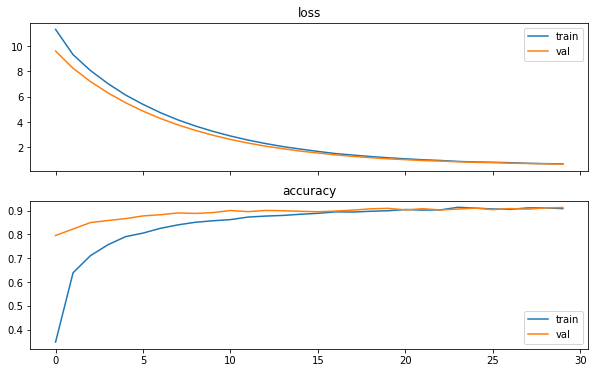

In [40]:
history_resnet_512_128 = resnet_512_128.fit(x_train, y_train, batch_size=48, epochs=30,
                                    validation_data=(x_val, y_val), verbose=2,
                                    callbacks=[lrPlatCallBack])

plot_history(history_resnet_512_128.history)